In [23]:
# Imports
import os
import numpy as np
import matplotlib.image as img
from matplotlib import pyplot as plt

# Part 1: PCA
#### Implement PCA to represent faces onto a lower dimensional space. You would need to do some experimentation to pick the appropriate number of basis vectors in the lower dimensional space, let us say K eigenvectors.

In [46]:
# Load the training data
train_data = []
train_labels = []

# Load the images and labels
for root, dirs, files in os.walk("./StarterFiles/Train1/"):
    for file in files:
        # Load the image
        image = img.imread(os.path.join(root, file))
        # Flatten the image (convert 2D array to 1D array), transpose it (convert row vector to column vector) and append it to the train_data
        image = np.array(image.flatten())
        train_data.append(image)
        # Append the label
        train_labels.append(file.split("/")[-1])

# Convert the lists to numpy arrays
train_data = np.array(train_data).T
train_labels = np.array(train_labels)
print(f"Train data shape: {train_data.shape}")

# Load the test data
test_data = []
test_labels = []
# Load the images and labels
for root, dirs, files in os.walk("./StarterFiles/Test1/"):
    for file in files:
        # Load the image
        image = img.imread(os.path.join(root, file))
        # Flatten the image (convert 2D array to 1D array), transpose it (convert row vector to column vector) and append it to the test_data
        image = np.array(image.flatten())
        test_data.append(image)
        # Append the label
        test_labels.append(file.split("/")[-1])

# Convert the lists to numpy arrays
test_data = np.array(test_data).T
test_labels = np.array(test_labels)
print(f"Test data shape: {test_data.shape}")

# Compute the mean face
mean_face = np.mean(train_data, axis=1).reshape(-1, 1)
print(f"Mean face shape: {mean_face.shape}")

# Compute the mean centered faces
A = train_data - mean_face
print(f"Centered faces shape: {A.shape}")

# Compute the covariance matrix as per the formula A^T * A
cov_matrix = np.dot(A.T, A)
print(f"Covariance matrix shape: {cov_matrix.shape}")

# Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, v_eigenvectors = np.linalg.eig(cov_matrix)
u_eigenvectors = np.dot(A, v_eigenvectors)
print(f"Eigenvalues shape: {eigenvalues.shape}")
print(f"Eigenvectors shape: {v_eigenvectors.shape}")
print(f"Eigenvalues: {eigenvalues}")

# Determine how many eigenvectors explain 90% of the variance
total_variance = np.sum(eigenvalues)
explained_variance = 0
k = 0
for i in range(len(eigenvalues)):
    explained_variance += eigenvalues[i]
    if explained_variance / total_variance >= 0.90:
        k = i + 1
        break
print(f"Number of eigenvectors to explain 90% of the variance: {k}")

# Take this number of eigenvectors and scale them to unit length to form the principal components:
principal_components = np.array([u_eigenvectors[:, i] / np.linalg.norm(u_eigenvectors[:, i]) for i in range(k)]).T
print(f"Principal components shape: {principal_components.shape}")
print(f"Magnitude of the first principal component: {np.linalg.norm(principal_components[:, 0])}")

Train data shape: (19500, 3772)
Test data shape: (19500, 44)
Mean face shape: (19500, 1)
Centered faces shape: (19500, 3772)
Covariance matrix shape: (3772, 3772)
Eigenvalues shape: (3772,)
Eigenvectors shape: (3772, 3772)
Eigenvalues: [3.01853707e+10 2.56165913e+10 1.24712773e+10 ... 1.05331667e+06
 1.04732870e+06 1.03892665e+06]
Number of eigenvectors to explain 90% of the variance: 264
Principal components shape: (19500, 264)
Magnitude of the first principal component: 0.9999999999999999


# Part 2: Display Some of the Top K Eigenfaces
#### Display some of the top K eigenvectors also called the eigenfaces.

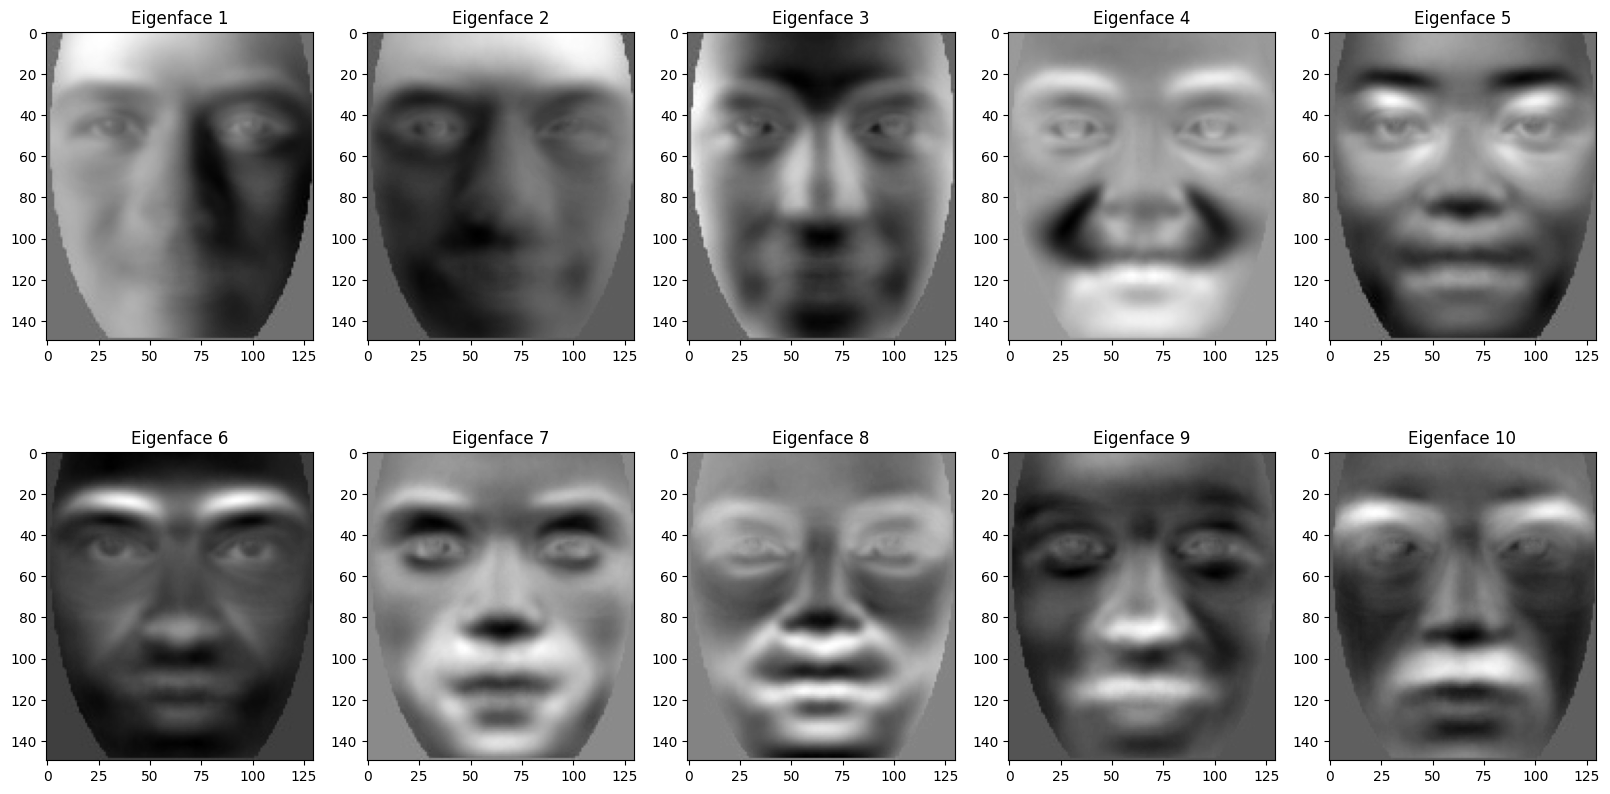

In [25]:
# Represent 10 of the top K eigenvectors as images
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
for i in range(10):
    row = i // 5
    col = i % 5
    axes[row, col].imshow(principal_components[:,i].reshape(150, 130), cmap="gray")
    axes[row, col].set_title(f"Eigenface {i+1}")

# Part 3: Reconstruct Faces
#### Show (display) few examples of faces represented as a linear combination of the K eigenvectors and compare it with the original image.

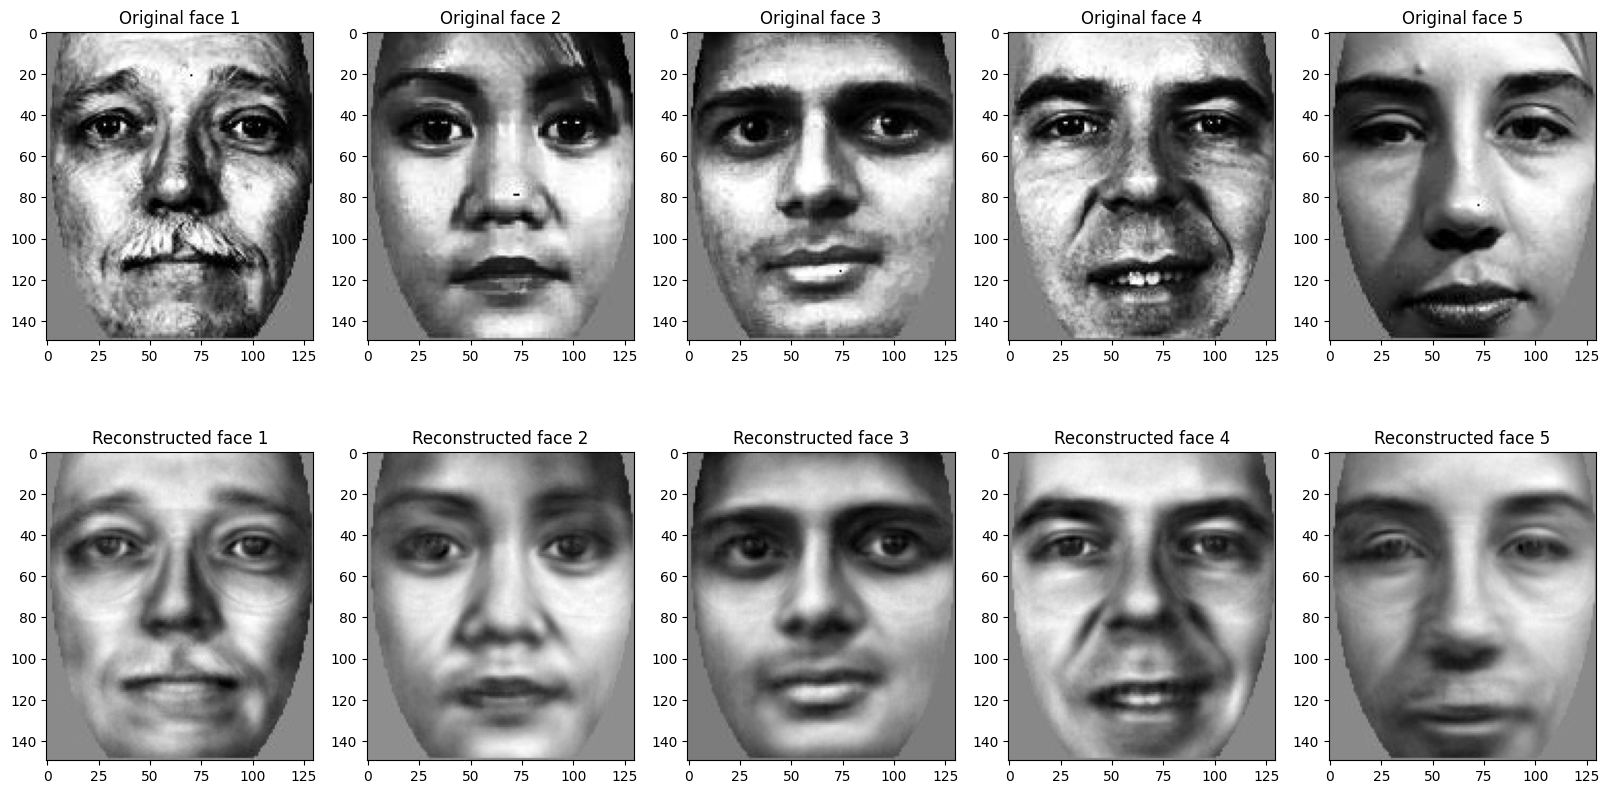

In [31]:

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
for i in range(5):
    col = i % 5
    # Original face
    axes[0, col].imshow(train_data[:, i].reshape(150, 130), cmap="gray")
    axes[0, col].set_title(f"Original face {i+1}")
    # Reconstruct the face
    w = np.dot(principal_components.T, train_data[:, i].reshape(-1, 1) - mean_face)
    reconstructed_face = mean_face + np.dot(principal_components, w)
    axes[1, col].imshow(reconstructed_face.reshape(150, 130), cmap="gray")
    axes[1, col].set_title(f"Reconstructed face {i+1}")

# Part 4: Face Recognition
#### Perform face recognition in the lower dimensional space on the test images. Pick any test image to show the results. You may use any of the images from the test dataset and find the closest images to that image from the training dataset. If your face recognition is working well, you would find the images of the same person as the test image. You won't need to do this step on all the test images.

Accuracy: 0.75
There were 11 failures: [0, 6, 7, 8, 9, 22, 26, 35, 37, 40, 41]


1

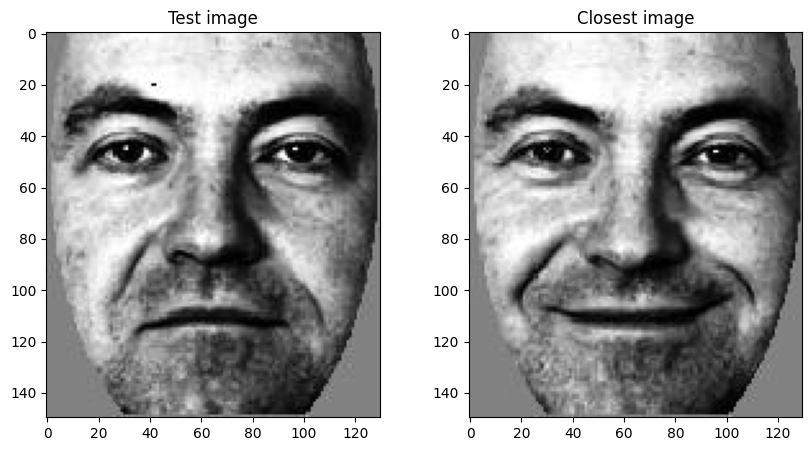

In [44]:
# Project the training data onto the principal components
train_data_projected = np.dot(principal_components.T, A)

# Project the test data onto the principal components
test_data_projected = np.dot(principal_components.T, test_data - mean_face)

# Function to find the closest image to a test image
def find_closest_image(test_index, print_images=True):
  test_image = test_data_projected[:, test_index].reshape(-1, 1)
  # Compute the distance between the test image and all the training images
  distances = np.linalg.norm(train_data_projected - test_image, axis=0)
  # Find the index of the closest image
  closest_image_index = np.argmin(distances)
  # Display the closest image
  if print_images:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(test_data[:, test_index].reshape(150, 130), cmap="gray")
    axes[0].set_title("Test image")
    axes[1].imshow(train_data[:, closest_image_index].reshape(150, 130), cmap="gray")
    axes[1].set_title("Closest image")
  if (test_labels[test_index][:5] == train_labels[closest_image_index][:5]):
    return 1
  else:
    return 0

accuracy = 0
failures = []
for i in range(44):
  match = find_closest_image(i, False)
  accuracy += match
  if match == 0:
    failures.append(i)
print(f"Accuracy: {accuracy/44}")
print(f"There were {len(failures)} failures: {failures}")

find_closest_image(10)